In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels

In [3]:
df1 = pd.read_csv('../qm_groupwork/data/datasource.csv')

In [4]:
df1

,borough_name,borough_code,borough_area_hectare,green_area_hectare,blue _area_hectare,green+blue_area_hectare,percent_green,percent_blue,percent_green+blue,population,...,number_annual_age15+_females,meanpercent_homes_with_good_access,meanpercent_home_with_deficiency_access,any_neurotic_disorder_per1000,all_phobias_per1000,depressive_episode_per1000,generalised_anxiety_disorder_per1000,mixed_anxiety_depression,obsessive_compulsive_disorder_per1000,panic_ disorder_per1000
0,City of London,E09000001,314.94,17.61,24.31,41.92,5.59,7.72,13.31,"7,400",...,0,0,100,190.6,22.041537,39.516764,60.4,84.4,15.9,9.4
1,Barking and Dagenham,E09000002,3779.93,1481.78,230.50,1712.28,39.20,6.10,45.30,"185,900",...,2,72,28,177.5,21.301491,34.411868,51.1,82.6,15.2,8.2
2,Barnet,E09000003,8674.84,5030.91,60.01,5090.92,57.99,0.69,58.69,"356,400",...,13,82,18,167.4,19.969920,32.483563,49.0,77.4,14.1,7.9
3,Bexley,E09000004,6428.65,2759.07,437.52,3196.59,42.92,6.81,49.72,"232,000",...,4,83,17,155.6,18.456990,30.428115,45.9,71.7,13.0,7.3
4,Brent,E09000005,4323.27,1726.56,44.59,1771.15,39.94,1.03,40.97,"311,200",...,3,82,18,182.3,21.760559,35.195831,53.0,84.4,15.5,8.5
5,Bromley,E09000006,15013.49,10262.64,56.96,10319.60,68.36,0.38,68.74,"309,400",...,8,82,18,157.7,18.742408,30.980945,47.2,72.4,13.1,7.4
6,Camden,E09000007,2178.93,943.02,19.81,962.83,43.28,0.91,44.19,"220,300",...,8,71,29,206.3,24.698391,39.258031,58.5,97.0,17.8,9.5
7,Croydon,E09000008,8649.44,4802.84,11.56,4814.40,55.53,0.13,55.66,"363,400",...,6,70,30,172.4,20.718164,33.733624,50.9,79.5,14.6,8.0
8,Ealing,E09000009,5554.43,2441.65,52.21,2493.87,43.96,0.94,44.90,"338,400",...,1,75,25,174.4,20.809948,34.029337,51.7,80.0,14.7,8.2
9,Enfield,E09000010,8220.02,4352.73,424.01,4776.74,52.95,5.16,58.11,"312,500",...,2,54,46,170.7,20.369817,33.357213,50.4,78.7,14.4,7.9


In [5]:
# 1.deathRate = numDeath/population -- death_persons;population
# 数据 清理 + 死亡率计算
df1['deathRate'] = (df1.death_persons.str.replace(',', '').astype(float)/df1.population.str.replace(',','').astype(float))*100

In [6]:
# 2. percent_green -- deathRate 
# This performs a multiple regression of percent_green against deathRate:

# 最小二乘法 
# percent_green -- deathRate 列名
olsGreenDeath = smf.ols(formula='deathRate ~ percent_green',data=df1).fit()

# And this gives a big summary of the results:
print(olsGreenDeath.summary())

#type(olsGreenDeath)
#statsmodels.regression.linear_model.RegressionResultsWrapper 回归结果容器，包含多个参数

                            OLS Regression Results                            
Dep. Variable:              deathRate   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     39.92
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           4.97e-07
Time:                        23:38:10   Log-Likelihood:                 33.594
No. Observations:                  33   AIC:                            -63.19
Df Residuals:                      31   BIC:                            -60.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2334      0.057      4.129

In [7]:
# 3. build a formula 
# Pick out some values of interest and print the regression equation: y=mx+c or y=beta_1*x + beta_0

# Intercept 截距

# The order of results: intercept term, slope term
# olsGreenDeath 参数  截距+斜率
beta_0, beta_1 = olsGreenDeath.params
rsq    = olsGreenDeath.rsquared
pval_0, pval_1 = olsGreenDeath.pvalues
# 格式化输出模型
print("y =", round(beta_1,5), "x +", round(beta_0,5))

# <0.6 相关性低 模型意义小
print("R^2 = ", rsq)
print("p-value of greenery = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = 0.00787 x + 0.23342
R^2 =  0.5629073659001678
p-value of greenery =  0.0
p-value of intercept =  0.00025


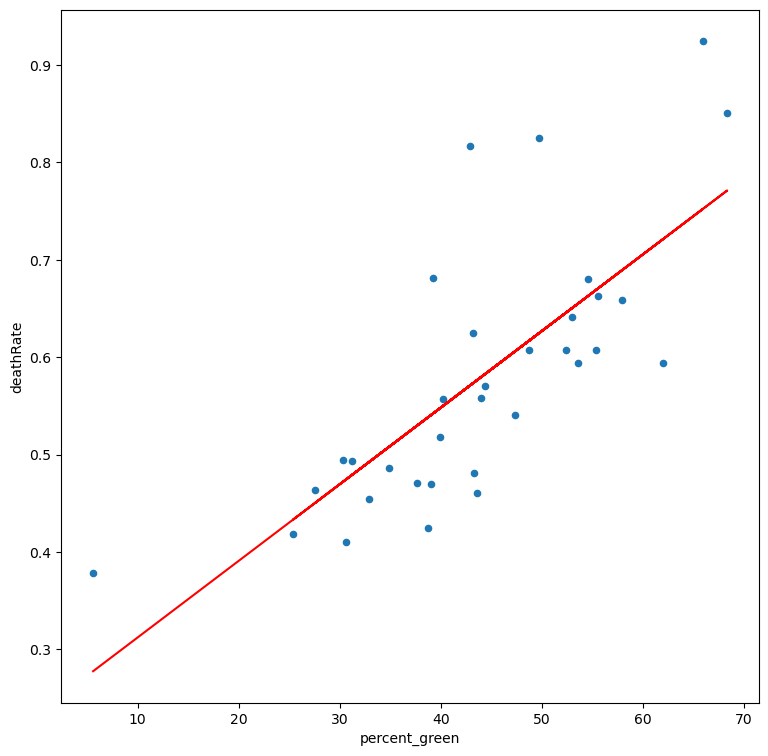

In [8]:
# 4. plot the result
fig, ax = plt.subplots()
df1.plot(kind='scatter', x='percent_green', y='deathRate', figsize=(9, 9), ax = ax)
X=df1.percent_green
b = plt.plot(X, X*beta_1 + beta_0, 'r') # Plot the regression line.

In [9]:
# print("y =", round(beta_1,5), "x +", round(beta_0,5))
# print("Rsq = ", rsq)
# print("p-value of greenery = ", pval_1)

In [10]:
# 模型效果 差 -- 对 deathRate 进行log变换 
# R^2 =  0.5629073659001678 < 0.6

<Axes: ylabel='Frequency'>

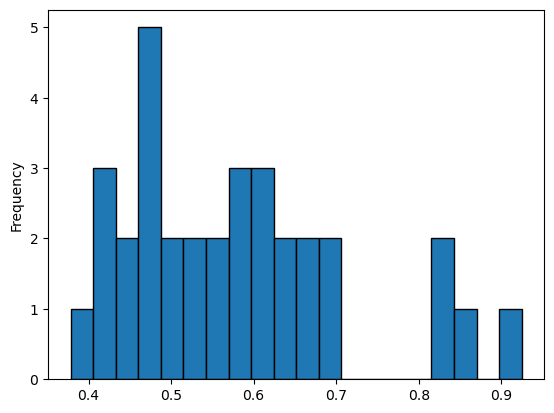

In [11]:
# 数据原始 分布-- 不太符合正态分布
df1['deathRate'].plot(kind='hist', bins=20, edgecolor='black')、

In [12]:
# log 
df1["log_deathRate"] = np.log(df1["deathRate"])

In [13]:
df1

,borough_name,borough_code,borough_area_hectare,green_area_hectare,blue _area_hectare,green+blue_area_hectare,percent_green,percent_blue,percent_green+blue,population,...,meanpercent_home_with_deficiency_access,any_neurotic_disorder_per1000,all_phobias_per1000,depressive_episode_per1000,generalised_anxiety_disorder_per1000,mixed_anxiety_depression,obsessive_compulsive_disorder_per1000,panic_ disorder_per1000,deathRate,log_deathRate
0,City of London,E09000001,314.94,17.61,24.31,41.92,5.59,7.72,13.31,"7,400",...,100,190.6,22.041537,39.516764,60.4,84.4,15.9,9.4,0.378378,-0.971861
1,Barking and Dagenham,E09000002,3779.93,1481.78,230.50,1712.28,39.20,6.10,45.30,"185,900",...,28,177.5,21.301491,34.411868,51.1,82.6,15.2,8.2,0.681011,-0.384176
2,Barnet,E09000003,8674.84,5030.91,60.01,5090.92,57.99,0.69,58.69,"356,400",...,18,167.4,19.969920,32.483563,49.0,77.4,14.1,7.9,0.659091,-0.416894
3,Bexley,E09000004,6428.65,2759.07,437.52,3196.59,42.92,6.81,49.72,"232,000",...,17,155.6,18.456990,30.428115,45.9,71.7,13.0,7.3,0.817241,-0.201821
4,Brent,E09000005,4323.27,1726.56,44.59,1771.15,39.94,1.03,40.97,"311,200",...,18,182.3,21.760559,35.195831,53.0,84.4,15.5,8.5,0.517995,-0.657790
5,Bromley,E09000006,15013.49,10262.64,56.96,10319.60,68.36,0.38,68.74,"309,400",...,18,157.7,18.742408,30.980945,47.2,72.4,13.1,7.4,0.850356,-0.162101
6,Camden,E09000007,2178.93,943.02,19.81,962.83,43.28,0.91,44.19,"220,300",...,29,206.3,24.698391,39.258031,58.5,97.0,17.8,9.5,0.481162,-0.731551
7,Croydon,E09000008,8649.44,4802.84,11.56,4814.40,55.53,0.13,55.66,"363,400",...,30,172.4,20.718164,33.733624,50.9,79.5,14.6,8.0,0.662631,-0.411537
8,Ealing,E09000009,5554.43,2441.65,52.21,2493.87,43.96,0.94,44.90,"338,400",...,25,174.4,20.809948,34.029337,51.7,80.0,14.7,8.2,0.558215,-0.583011
9,Enfield,E09000010,8220.02,4352.73,424.01,4776.74,52.95,5.16,58.11,"312,500",...,46,170.7,20.369817,33.357213,50.4,78.7,14.4,7.9,0.641280,-0.444289


<Axes: ylabel='Frequency'>

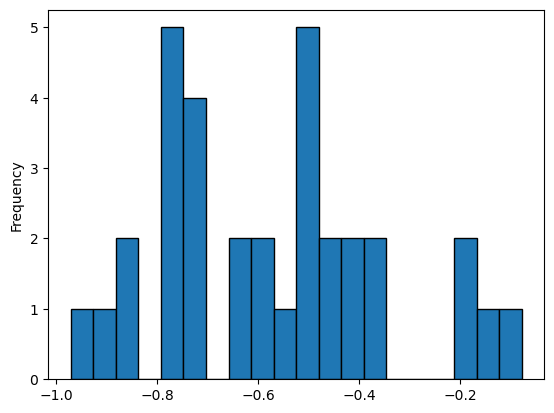

In [14]:
# 更符合正态分布  more like normally distribute 
df1['log_deathRate'].plot(kind='hist', bins=20, edgecolor='black')

In [15]:
# again 
# percent_green -- log_deathRate 
# This performs a multiple regression of percent_green against log_deathRate:

# 最小二乘法 
# percent_green -- deathRate 列名
olsGreenLogDeath = smf.ols(formula='log_deathRate ~ percent_green',data=df1).fit()

# And this gives a big summary of the results:
print(olsGreenLogDeath.summary())

#type(olsGreenDeath)
#statsmodels.regression.linear_model.RegressionResultsWrapper 回归结果容器，包含多个参数

                            OLS Regression Results                            
Dep. Variable:          log_deathRate   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     50.33
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           5.71e-08
Time:                        23:38:16   Log-Likelihood:                 19.233
No. Observations:                  33   AIC:                            -34.47
Df Residuals:                      31   BIC:                            -31.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1706      0.087    -13.401

In [16]:
# build a formula 
# Pick out some values of interest and print the regression equation: y=mx+c or y=beta_1*x + beta_0

# Intercept 截距

# The order of results: intercept term, slope term
# olsGreenDeath 参数  截距+斜率
logBeta_0, logBeta_1 = olsGreenLogDeath.params
logRsq    = olsGreenLogDeath.rsquared
logPval_0, logPval_1 = olsGreenLogDeath.pvalues
# 格式化输出模型
print("y =", round(logBeta_1,5), "x +", round(logBeta_0,5))

# >0.6 相关性低 模型有一点点 意义  -- 略大于 0.6
print("R^2 = ", logRsq)
print("p-value of greenery = ", round(logPval_1,5))
print("p-value of intercept = ", round(logPval_0,5))

y = 0.01365 x + -1.17061
R^2 =  0.6188292845173731
p-value of greenery =  0.0
p-value of intercept =  0.0


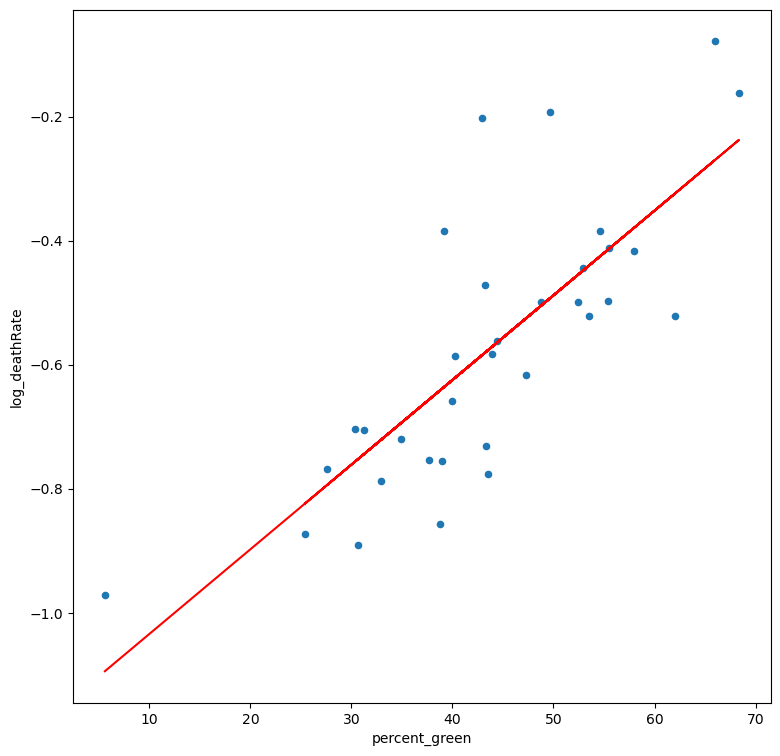

In [17]:
# 制图
fig, ax = plt.subplots()
df1.plot(kind='scatter', x='percent_green', y='log_deathRate', figsize=(9, 9), ax = ax)
X=df1.percent_green
b = plt.plot(X, X*logBeta_1 + logBeta_0, 'r') # Plot the regression line.

## 上述 结果不符合实际情况，考虑使用人均绿地面积建模 just try

<Axes: ylabel='Frequency'>

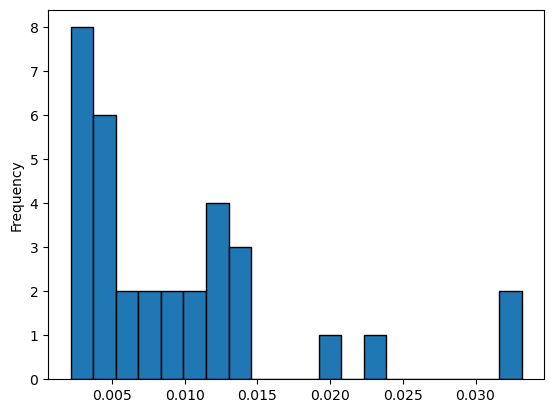

In [22]:
# 人均绿地面积--死亡率
# green_area_hectare // death_persons
# population
# greenAreaPersons = green_area_hectare/population -- green_area_hectare;population
# 数据 清理 + 死亡率计算
df1['greenAreaPersons'] = (df1.green_area_hectare/df1.population.str.replace(',','').astype(float))
df1['greenAreaPersons'].plot(kind='hist', bins=20, edgecolor='black')

In [33]:
# 2. greenAreaPersons -- deathRate 
# This performs a multiple regression of greenAreaPersons against deathRate:

# 最小二乘法 
# percent_green -- deathRate 列名
olsGreenDeath = smf.ols(formula='deathRate ~ greenAreaPersons',data=df1).fit()

# And this gives a big summary of the results:
print(olsGreenDeath.summary())

                            OLS Regression Results                            
Dep. Variable:              deathRate   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     69.50
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           2.04e-09
Time:                        23:47:48   Log-Likelihood:                 39.346
No. Observations:                  33   AIC:                            -74.69
Df Residuals:                      31   BIC:                            -71.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4432      0.021  

y = 14.17584 x + 0.44319
R^2 =  0.6915565172243435
p-value of greenery =  0.0
p-value of intercept =  0.0


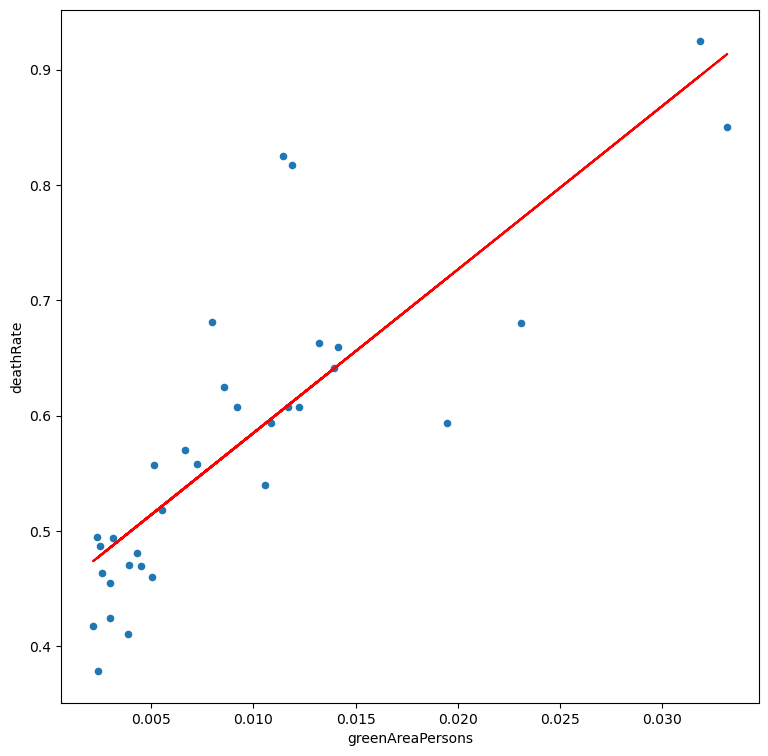

In [35]:
# build a formula 
# Pick out some values of interest and print the regression equation: y=mx+c or y=beta_1*x + beta_0

# Intercept 截距

# The order of results: intercept term, slope term
# olsGreenDeath 参数  截距+斜率
logBeta_0, logBeta_1 = olsGreenDeath.params
logRsq    = olsGreenDeath.rsquared
logPval_0, logPval_1 = olsGreenDeath.pvalues
# 格式化输出模型
print("y =", round(logBeta_1,5), "x +", round(logBeta_0,5))

#
print("R^2 = ", logRsq)
print("p-value of greenery = ", round(logPval_1,5))
print("p-value of intercept = ", round(logPval_0,5))

# 制图
fig, ax = plt.subplots()
df1.plot(kind='scatter', x='greenAreaPersons', y='deathRate', figsize=(9, 9), ax = ax)
X=df1.greenAreaPersons
b = plt.plot(X, X*logBeta_1 + logBeta_0, 'r') # Plot the regression line.